회귀
   - 값을 예측

In [3]:
import numpy as np

In [4]:
length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

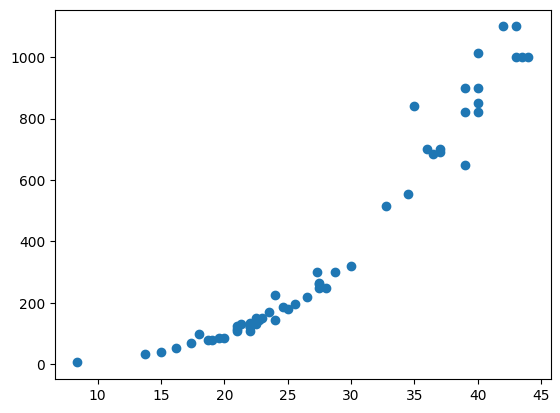

In [5]:
import matplotlib.pyplot as plt
plt.scatter(length,weight)
plt.show()

In [6]:
# 데이터분할

In [20]:
from sklearn.model_selection import train_test_split
length = length.reshape(-1,1)
weight = weight.reshape(-1,1)
x_train,x_test,y_train,y_test =  train_test_split(length,weight,random_state=45)
x_train.shape,  x_test.shape, y_train.shape,  y_test.shape

((42, 1), (14, 1), (42, 1), (14, 1))

In [21]:
#모델 선택
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# 훈련
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [22]:
#평가
knr.score(x_test,y_test)

0.980772279692558

In [23]:
# MAE로 평가 (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error

In [24]:
y_pred = knr.predict(x_test)
mae =  mean_absolute_error(y_test, y_pred)
mae

37.15714285714286

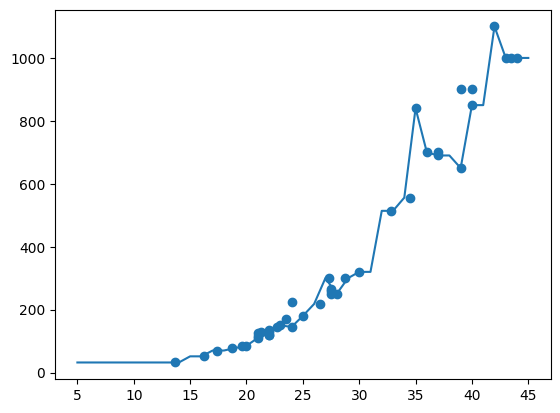

mae : 43.18571428571429


In [33]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(x_train,y_train)
plt.scatter(x_train,y_train)
# x축의 범위인 5 ~45의 데이터의 예측값을
x = np.arange(5,46).reshape(-1,1)
plt.plot(x, knr.predict(x))
plt.show()

y_pred = knr.predict(x_test)
mae =  mean_absolute_error(y_test, y_pred)
print(f'mae : {mae}')

In [42]:
# mae_max = float('-inf')
mae_min = float('inf')
min_n = 0
for n in range(1,40):
  knr = KNeighborsRegressor(n_neighbors=n)
  knr.fit(x_train,y_train)

  y_pred = knr.predict(x_test)
  mae =  mean_absolute_error(y_test, y_pred)
  if mae_min > mae:
    min_n = n
    mae_min = mae

In [43]:
min_n, mae_min

(4, 33.64107142857143)

------------------------------------